### Import trained model
Run `nvidia-smi -l 1` to check the memory being used by what.
You will need to restart the kernel if the program is crashing as jupyter stays allive and keeps the data in the memory.

In [1]:
import pickle
import keras
import librosa
import librosa.display
import numpy as np
from sklearn import metrics

# sound_model_file = "sound_model.pkl"

# model = None

# with open(sound_model_file, 'rb') as file:
#     model = pickle.load(file)

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r model 
%store -r le
%store -r X
%store -r y


Using TensorFlow backend.


In [2]:
usl = "../resources/UrbanSound8K/"

In [3]:
num_rows = 40
num_columns = 174
num_channels = 1

max_pad_len = 174

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=1)
print("Testing Accuracy: ", score[1])

6985/6985 [==============================] - 1s 163us/step
Training Accuracy:  0.9894058704376221
1747/1747 [==============================] - 0s 76us/step
Testing Accuracy:  0.9215798377990723


In [27]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [28]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name, e)
        return None 
     
    return mfccs

In [29]:
# Class: Air Conditioner

filename = usl + 'audio/fold5/100852-0-0-0.wav' 
print_prediction(filename) 

['air_conditioner']
The predicted class is: air_conditioner 

air_conditioner 		 :  0.99999260902404785156250000000000
car_horn 		 :  0.00000002983205860118687269277871
children_playing 		 :  0.00000058146531500824494287371635
dog_bark 		 :  0.00000000050862752898339635976299
drilling 		 :  0.00000285252463072538375854492188
engine_idling 		 :  0.00000000170942826560604999031057
gun_shot 		 :  0.00000000006742061076092653593150
jackhammer 		 :  0.00000388884200219763442873954773
siren 		 :  0.00000000017225125492625892320575
street_music 		 :  0.00000000667146826671682902087923


In [7]:
predictions = model.predict(x_test)
y_pred = (predictions > 0.5)
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [8]:
print(matrix)

[[197   0   1   0   1   0   0   2   0   2]
 [  4  77   0   1   2   2   0   0   0   0]
 [  6   0 153   2   1   5   0   0   4  12]
 [  7   2   3 175   3   1   4   0   3   3]
 [  2   2   2   1 189   0   3   6   0   1]
 [  3   0   0   0   1 188   0   1   0   0]
 [  2   0   0   1   0   0  69   0   0   0]
 [  0   0   0   0   8   0   0 198   0   2]
 [  1   0   1   2   1   0   0   2 158   0]
 [ 10   0  13   3   0   1   0   2   4 197]]


NameError: name 'label_names' is not defined

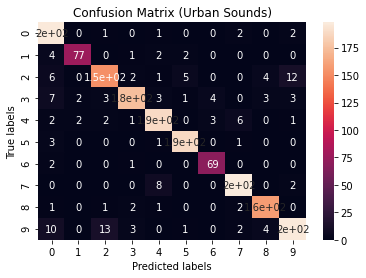

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Urban Sounds)')
ax.xaxis.set_ticklabels(label_names, rotation='vertical');
ax.yaxis.set_ticklabels(label_names, rotation='horizontal');

plt.show()